<a href="https://colab.research.google.com/github/Rodrigo-Lopes-de-Andrade/Artigos_e_Projetos/blob/main/Feature_Engineering_Metodos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a class="anchor" id="0"></a>
# **Um guia de referência para métodos de engenharia de atributos**


Olá amigos,


**Engenharia de atributos** é a base de qualquer modelo de aprendizado de máquina. O sucesso de qualquer modelo de aprendizado de máquina depende da aplicação de várias técnicas de engenharia de recursos. Portanto, neste kernel, discutirei várias técnicas de **Engenharia de atributos** que nos ajudarão a extrair, preparar e projetar recursos de nosso conjunto de dados de maneira adequada.

Então vamos começar.

- Este kernel é baseado no curso de Soledad Galli - [Feature Engineering for Machine Learning] (https://www.udemy.com/course/feature-engineering-for-machine-learning/) e seu artigo - [Feature Engineering for Machine Aprendendo; Uma visão geral abrangente] (https://www.trainindata.com/post/feature-engineering-comprehensive-overview).

- Ela fez um trabalho fabuloso no curso acima, onde reuniu todas as principais técnicas de engenharia de recursos em um só lugar. Eu adaptei o código e as instruções de seu curso e artigo neste kernel. Eu gosto de parabenizá-la 
por seu excelente trabalho.

<a class="anchor" id="0.1"></a>
## Índice


Introdução à Engenharia de Recursos 
2. Visão geral das técnicas de engenharia de atributos 
3.Imputação de dados ausentes
   - 3.1 Análise de Caso Completa
   - 3.2 Média / Mediana / Imputação de modo
   - 3.3 Imputação de amostra aleatória
   - 3.4 Substituição por valor arbitrário
   - 3,5 fim de imputação de distribuição
   - 3.6 Indicador de valor ausente
4. Codificação categórica
   - 4.1 One-Hot Encoding (OHE)
   - 4.2 Codificação Ordinal
   - 4.3 Codificação de contagem e frequência
   - 4.4 Codificação de destino / média
   - 4.5 Peso da evidência
5. Transformação variável
   - 5.1 Transformação Logarítmica
   - 5.2 Transformação Recíproca
   - 5.3 Transformação de raiz quadrada
   - 5.4 Transformação Box-Cox
6. Discretização
   - 6.1 Discretização de largura igual com função de corte de pandas
   - 6.2 Discretização de frequência igual com função pandas qcut
   - 6.3 discretização do conhecimento do domínio
7. Engenharia Outlier
   - 7.1 Remoção de outlier
   - 7.2 Tratando outliers como valores ausentes
   - 7.3 Discretização
   - 7.4 codificação superior / inferior / zero
8. Engenharia de Dados e Tempo
9. Referências









# **1. Introduction to Feature Engineering** <a class="anchor" id="1"></a>


Em termos de site da Wikipedia:

**Feature Engineering é o processo de usar o conhecimento de domínio para extrair recursos de dados brutos por meio de técnicas de mineração de dados. Esses recursos podem ser usados ​​para melhorar o desempenho de algoritmos de aprendizado de máquina. A engenharia de recursos pode ser considerada como o próprio aprendizado de máquina aplicado**

Fonte: https://en.wikipedia.org/wiki/Feature_engineering


Outra definição importante de Engenharia de Recursos é a seguinte: -

**Criar recursos é difícil, demorado e requer conhecimento especializado. "Aprendizado de máquina aplicado" é basicamente engenharia de recursos.**

- Andrew Ng, aprendizado de máquina e IA via simulações cerebrais


- Portanto, a engenharia de recursos é o processo de criação de recursos úteis em um modelo de aprendizado de máquina. Podemos ver que o sucesso de qualquer modelo de aprendizado de máquina depende da aplicação de várias técnicas de engenharia de recursos.

# **2. Overview of Feature Engineering** <a class="anchor" id="2"></a>

- **Feature engineering** é um termo muito amplo que consiste em diferentes técnicas para processar dados. Essas técnicas nos ajudam a processar nossos dados brutos em dados processados ​​prontos para serem alimentados em um algoritmo de aprendizado de máquina. Essas técnicas incluem o preenchimento de valores ausentes, codificação de variáveis ​​categóricas, transformação de variáveis, criação de novas variáveis ​​a partir das existentes e outras.

 
- Nesta seção, listarei as principais técnicas de engenharia de recursos para processar os dados. Nas seções a seguir, descreverei cada técnica e suas aplicações.


- As técnicas de engenharia de recursos que discutiremos neste kernel são as seguintes: -


Falta de imputação de dados
2. Codificação categórica
3. Transformação de variável
4. Discretização
6. Engenharia de outlier
7. Engenharia de data e hora

# **3. Missing data imputation**  <a class="anchor" id="3"></a>



- Dados ausentes ou valores ausentes ocorrem quando nenhum dado / valor é armazenado para uma determinada observação dentro de uma variável.

- Dados ausentes são uma ocorrência comum e podem ter um efeito significativo nas conclusões que podem ser tiradas dos dados. Dados incompletos são um problema inevitável ao lidar com a maioria das fontes de dados.


- **Imputação** é o ato de substituir os dados ausentes por estimativas estatísticas dos valores ausentes. O objetivo de qualquer técnica de imputação é produzir um conjunto de dados completo que pode ser usado para treinar modelos de aprendizado de máquina.

 
- Existem várias técnicas para imputação de dados ausentes. São os seguintes: -

  1. Análise de caso completa

  2. Imputação média / mediana / modo

  Imputação de amostra aleatória

  4. Substituição por valor arbitrário

  5. Fim da Imputação de Distribuição

  6. Indicador de valor ausente
  
  Imputação multivariada

## **Mecanismos de dados ausentes**

- Existem 3 mecanismos que levam à perda de dados, 2 deles envolvem dados ausentes aleatoriamente ou quase aleatoriamente, e o terceiro envolve uma perda sistemática de dados.

#### **Totalmente ausente no aleatório - Missing Completely at Random - MCAR**

- Uma variável está faltando completamente ao acaso (MCAR) se a probabilidade de estar faltando é a mesma para todas as observações. Quando os dados são MCAR, não há absolutamente nenhuma relação entre os dados ausentes e quaisquer outros valores, observados ou ausentes, no conjunto de dados. Em outras palavras, esses pontos de dados ausentes são um subconjunto aleatório dos dados. Não há nada sistemático acontecendo que torne alguns dados mais prováveis ​​de serem perdidos do que outros.

- Se os valores das observações estiverem faltando completamente ao acaso, desconsiderar esses casos não afetaria as inferências feitas.

#### **Faltando aleatoriamente, MAR - Missing at Random - MAR**

- MAR ocorre quando há uma relação sistemática entre a propensão de valores ausentes e os dados observados. Em outras palavras, a probabilidade de uma observação estar faltando depende apenas das informações disponíveis (outras variáveis ​​no conjunto de dados). Por exemplo, se os homens são mais propensos a revelar seu peso do que as mulheres, o peso é MAR. A informação do peso estará faltando aleatoriamente para aqueles homens e mulheres que decidiram não divulgar seu peso, mas como os homens são mais propensos a divulgá-lo, haverá mais valores omissos para as mulheres do que para os homens.

- Em uma situação como a acima, se decidirmos prosseguir com a variável com valores ausentes (neste caso, peso), podemos nos beneficiar da inclusão de gênero para controlar o viés de peso para as observações ausentes.

#### **Faltando não aleatoriamente - Missing at Random - MAR**

- A falta de valores não é aleatória (MNAR) se a falta de valores depende de informações não registradas no conjunto de dados. Em outras palavras, existe um mecanismo ou uma razão pela qual os valores ausentes são introduzidos no conjunto de dados.

## **3.1 Complete Case Analysis (CCA)** <a class="anchor" id="3.1"></a>


- **Análise de caso completa** implica em analisar apenas as observações no conjunto de dados que contêm valores em todas as variáveis. Em outras palavras, na análise de caso completa, removemos todas as observações com valores ausentes. Este procedimento é adequado quando há poucas observações com dados ausentes no conjunto de dados.

- **Portanto, a análise de caso completo (CCA)**, também chamada de exclusão por lista de casos, consiste em simplesmente descartar as observações em que faltam valores em qualquer uma das variáveis. Análise de caso completa significa literalmente analisar apenas aquelas observações para as quais há informações em todas as variáveis ​​(Xs).

- Mas, se o conjunto de dados contém dados perdidos em várias variáveis, ou algumas variáveis ​​contêm uma alta proporção de observações ausentes, podemos remover facilmente uma grande parte do conjunto de dados, e isso é indesejável.

- O CCA pode ser aplicado a variáveis ​​categóricas e numéricas.

- Na prática, o CCA pode ser um método aceitável quando a quantidade de informações ausentes é pequena. Em muitos conjuntos de dados da vida real, a quantidade de dados ausentes nunca é pequena e, portanto, o CCA normalmente nunca é uma opção.

## **Aplicando CCA no Dataset do Titanic**

- Agora, vou demonstrar a aplicação do CCA no conjunto de dados do Titanic.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import pylab 
import scipy.stats as stats
import datetime
%matplotlib inline

pd.set_option('display.max_columns', None)


In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/Rodrigo-Lopes-de-Andrade/Datasets/main/Feature_Engineering_Methods_train.csv')

In [ ]:
# make a copy of titanic dataset
df = titanic.copy()

In [ ]:
 # check the percentage of missing values per variable

df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Agora, se optássemos por remover todas as observações faltantes, acabaríamos com um conjunto de dados muito pequeno, visto que falta Cabine para 77% das observações.

In [ ]:
# verifique quantas observações dropariamos
print('total de passageiros com valores em todas as variáveis: ', df.dropna().shape[0])
print('total de passageiros no Titanic: ', df.shape[0])
print('porcentagem de dados sem valores ausentes: ', df.dropna().shape[0]/ np.float(df.shape[0]))

total de passageiros com valores em todas as variáveis:  183
total de passageiros no Titanic:  891
porcentagem de dados sem valores ausentes:  0.2053872053872054


- Portanto, temos informações completas para apenas 20% de nossas observações no conjunto de dados do Titanic. Portanto, o CCA não seria uma opção para este conjunto de dados.

- Portanto, em conjuntos de dados com muitas variáveis ​​que contêm dados ausentes, o CCA normalmente não será uma opção, pois produzirá um conjunto de dados reduzido com observações completas. No entanto, se apenas um subconjunto das variáveis ​​do conjunto de dados for usado, poderíamos avaliar as variáveis ​​por variáveis, quer optemos por descartar valores com NA, ou substituí-los por outros métodos.

## **3.2 Mean / Median / Mode Imputation** <a class="anchor" id="3.2"></a>



- Podemos substituir os valores perdidos pela média, mediana ou modo da variável. A imputação de média / mediana / modo é amplamente adotada em organizações e competições de dados. Embora na prática essa técnica seja usada em quase todas as situações, o procedimento é adequado se os dados estiverem ausentes ao acaso e em pequenas proporções. Se houver muitas observações ausentes, no entanto, distorceremos a distribuição da variável, bem como sua relação com outras variáveis ​​no conjunto de dados. A distorção na distribuição das variáveis ​​pode afetar o desempenho dos modelos lineares.

- A imputação média / mediana consiste em substituir todas as ocorrências de valores perdidos (NA) dentro de uma variável pela média (se a variável tiver uma distribuição gaussiana) ou mediana (se a variável tiver uma distribuição assimétrica).

- Para variáveis ​​categóricas, a substituição pelo modo, também é conhecida como substituição pela categoria mais frequente.

- A imputação de média / mediana pressupõe que os dados estão ausentes completamente ao acaso (MCAR). Se for esse o caso, podemos pensar em substituir o NA pela ocorrência mais frequente da variável, que é a média se a variável tem uma distribuição gaussiana, ou a mediana caso contrário.

- A lógica é substituir a população de valores ausentes pelo valor mais frequente, uma vez que esta é a ocorrência mais provável.

- Ao substituir NA pela média ou mediana, a variância da variável será distorcida se o número de NA for grande em relação ao número total de observações (uma vez que os valores imputados não diferem da média ou entre si) . Portanto, levando a uma subestimação da variância.

- Além disso, as estimativas de covariância e correlações com outras variáveis ​​no conjunto de dados também podem ser afetadas. Isso porque podemos estar destruindo correlações intrínsecas, uma vez que a média / mediana que agora substitui NA não preservará a relação com as variáveis ​​restantes.

## **Mean / Median / Mode Imputation no dataset Titanic**

In [ ]:
# make a copy of titanic dataset
df2 = titanic.copy()

In [ ]:
# check the percentage of NA values in dataset

df2.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

### **Nota importante**

- A imputação deve ser feita no conjunto de treinamento e, em seguida, propagada para o conjunto de teste. Isso significa que a média / mediana a ser usada para preencher os valores ausentes tanto no trem quanto no conjunto de teste deve ser extraída apenas do conjunto do Titanic. E isso é para evitar overfitting.

- No conjunto de dados Titânic, podemos ver que `Age` contém 19,8653%,` Cabin` contém 77,10% e `Embarked` contém 0,22% de valores ausentes.

### **Variável de imputação age**

- `Age` é uma variável contínua. Primeiro, vamos verificar a distribuição das variáveis ​​`idade`.

Text(0.5, 0, 'Age')

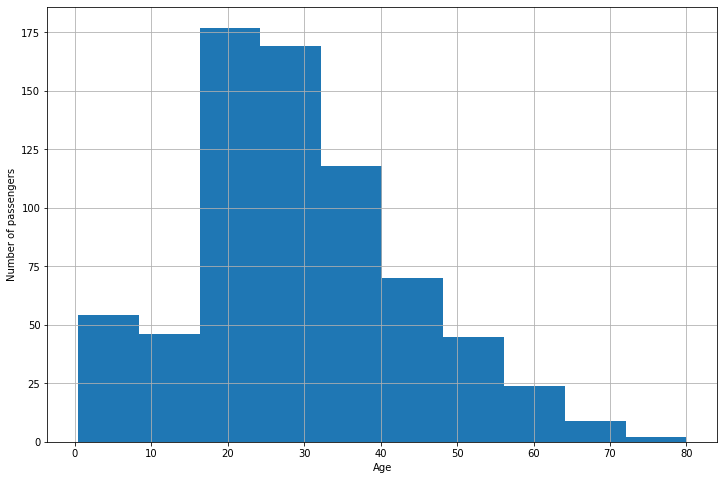

In [ ]:
# plotar a distribuição de idade para descobrir se eles são gaussianos ou enviesados.

plt.figure(figsize=(12,8))
fig = data2.Age.hist(bins=10)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

- Podemos ver que a distribuição de `idade` está distorcida. Portanto, usaremos a imputação mediana.

In [ ]:
# conjunto de dados separado em conjunto de treinamento e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2, df2.Survived, test_size=0.3, 
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [ ]:
# calculate median of Age
median = X_train.Age.median()
median

29.0

In [ ]:
# impute missing values in age in train and test set

for df in [X_train, X_test]:
    df['Age'].fillna(median, inplace=True)

### **Verifique se há valores ausentes na variável `age`**

In [ ]:
X_train['Age'].isnull().sum()

0

In [ ]:
X_test['Age'].isnull().sum()

0

- We can see that there are no missing values in `age` variable in the train and test set.

- Podemos seguir na mesma linha e preencher os valores ausentes em `Cabine` e` Embarked` com o valor mais frequente.

- **Imputação média / mediana / modo** é o método mais comum para imputar valores ausentes.

## **3.3 Imputação de amostra aleatória** <a class="anchor" id="3.3"> </a>


- A imputação de amostra aleatória refere-se à seleção aleatória de valores da variável para substituir os dados perdidos. Essa técnica preserva a distribuição de variáveis ​​e é adequada para dados ausentes aleatoriamente. Mas, precisamos levar em conta a aleatoriedade, definindo adequadamente uma semente. Caso contrário, a mesma observação ausente poderia ser substituída por valores diferentes em execuções de código diferentes e, portanto, levar a previsões de um modelo diferente. Isso não é desejável ao usar nossos modelos dentro de uma organização.

- A substituição de NA por amostragem aleatória para variáveis ​​categóricas é exatamente o mesmo que para variáveis ​​numéricas.

- A amostragem aleatória consiste em fazer uma observação aleatória do pool de observações disponíveis da variável, ou seja, do pool de categorias disponíveis, e usar esse valor extraído aleatoriamente para preencher o NA. Na amostragem aleatória, toma-se tantas observações aleatórias quanto os valores ausentes estiverem presentes na variável.

- Por observações de amostragem aleatória das categorias presentes, garantimos que a frequência das diferentes categorias / rótulos dentro da variável é preservada.

### Premissas

- A imputação de amostra aleatória pressupõe que os dados estão ausentes completamente ao acaso (MCAR). Nesse caso, faz sentido substituir os valores perdidos por valores extraídos da distribuição da variável / frequência da categoria original.
 

## **Random Sample imputation no dataset do Titânic**

In [ ]:
# make a copy of titanic dataset

df3 = titanic.copy()

In [ ]:
# check the percentage of NA values

df3.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

### **Nota importante**

A imputação deve ser feita no conjunto de treinamento e, em seguida, propagada para o conjunto de teste. Isso significa que a amostra aleatória a ser usada para preencher os valores ausentes tanto no trem quanto no conjunto de teste deve ser extraída do conjunto de trem.

In [ ]:
# conjunto de dados separado em conjunto de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(df3, df3.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [ ]:
# escreva uma função para criar 3 variáveis ​​de Idade:

def impute_na(df, variable, median):
    
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_zero'] = df[variable].fillna(0)
     
    # amostragem aleatória
    df[variable+'_random'] = df[variable]
    
    # extraia a amostra aleatória para preencher o na
    random_sample = X_train[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas precisa ter o mesmo índice para mesclar conjuntos de dados
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    # preencher com amostra aleatória
    df[variable+'_random_sample'] = df[variable].fillna(random_sample)

In [ ]:
impute_na(X_train, 'Age', median)

In [ ]:
impute_na(X_test, 'Age', median)

In [ ]:
# check the percentage of NA values

X_train['Age'].isnull().sum()

121

## **3.4 Substituição por valor arbitrário** <a class="anchor" id="3.4"> </a>



- A substituição por um valor arbitrário, como seus nomes indicam, refere-se à substituição de dados ausentes por qualquer valor determinado arbitrariamente, mas o mesmo valor para todos os dados ausentes. A substituição por um valor arbitrário é adequada se os dados não estiverem ausentes ao acaso ou se houver uma grande proporção de valores ausentes. Se todos os valores forem positivos, uma substituição típica é -1. Como alternativa, substituir por 999 ou -999 são práticas comuns. Precisamos antecipar que esses valores arbitrários não são uma ocorrência comum na variável. A substituição por valores arbitrários, entretanto, pode não ser adequada para modelos lineares, pois provavelmente distorcerá a distribuição das variáveis ​​e, portanto, as premissas do modelo podem não ser atendidas.

 
- Para variáveis ​​categóricas, isso equivale a substituir as observações ausentes pelo rótulo “Perdidas”, que é um procedimento amplamente adotado.

- Substituir o NA por valores artitrários deve ser usado quando houver razões para acreditar que o NA não está faltando ao acaso. Em situações como essa, não gostaríamos de substituir pela mediana ou pela média e, portanto, fazer com que NA se parecesse com a maioria de nossas observações.

- Em vez disso, queremos sinalizá-los. Queremos capturar a falta de alguma forma.

## **Replacement by Arbitrary Value on Titanic dataset**

In [ ]:
# make a copy of titanic dataset

data4 = titanic.copy()

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data4, data4.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [ ]:
def impute_na(df, variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundred']= df[variable].fillna(100)

In [ ]:
# replace NA with the median value in the training and test set
impute_na(X_train, 'Age')
impute_na(X_test, 'Age')

In [ ]:
X_train['Age'].isnull().sum()

121

- O valor arbitrário deve ser determinado para cada variável especificamente. Por exemplo, para este conjunto de dados, a escolha de substituir NA na idade por 0 ou 100 é válida, porque nenhum desses valores é frequente na distribuição original da variável e eles estão na cauda da distribuição.

- No entanto, se substituirmos NA na tarifa, esses valores não serão mais válidos, porque podemos ver que a tarifa pode assumir valores de até 500. Portanto, podemos considerar o uso de 500 ou 1000 para substituir NA em vez de 100.

- Podemos ver que isso é totalmente arbitrário. Mas, é usado na indústria. Os valores típicos escolhidos pelas empresas são -9999 ou 9999 ou semelhante.

## **3.5 Imputação de fim de distribuição** <a class="anchor" id="3.5"> </a>



- Fim da imputação da cauda envolve a substituição dos valores perdidos por um valor na extremidade da cauda da distribuição da variável. Essa técnica é semelhante em essência à imputação por um valor arbitrário. No entanto, ao colocar o valor no final da distribuição, não precisamos olhar para cada distribuição de variável individualmente, pois o algoritmo faz isso automaticamente para nós. Essa técnica de imputação tende a funcionar bem com algoritmos baseados em árvore, mas pode afetar o desempenho dos modelos lineares, pois distorce a distribuição das variáveis.

- Às vezes, temos motivos para suspeitar que os valores ausentes não estão ausentes ao acaso. E se o valor estiver faltando, deve haver uma razão para isso. Portanto, gostaríamos de capturar essas informações.

- Adicionar uma variável adicional indicando falta pode ajudar nesta tarefa. No entanto, os valores ainda estão ausentes na variável original e precisam ser substituídos se planejarmos usar a variável no aprendizado de máquina.

- Então, vamos substituir o NA, por valores que estão na extremidade da distribuição da variável.

- O raciocínio é que, se o valor estiver ausente, deve ser por uma razão, portanto, não gostaríamos de substituir os valores ausentes pela média e fazer essa observação parecer a maioria de nossas observações. Em vez disso, queremos sinalizar essa observação como diferente e, portanto, atribuímos um valor que está na cauda da distribuição, onde as observações raramente são representadas na população.

## **End of Distribution Imputation on Titanic dataset**

In [ ]:
# make a copy of titanic dataset

data5 = titanic.copy()

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data5, data5.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

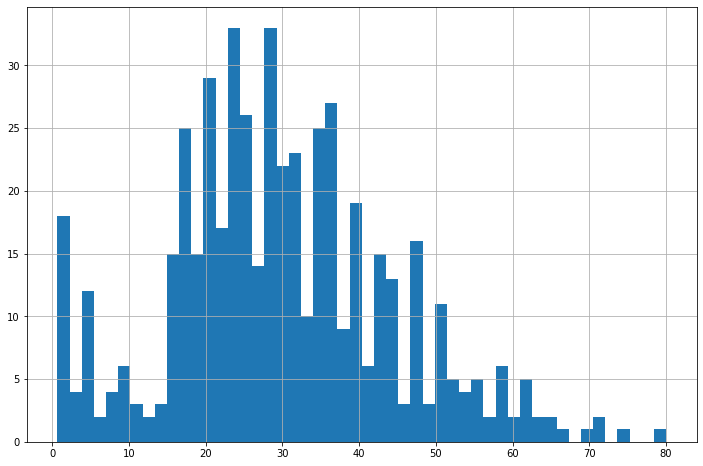

In [ ]:
plt.figure(figsize=(12,8))
X_train.Age.hist(bins=50)

In [ ]:
# at far end of the distribution
X_train.Age.mean()+3*X_train.Age.std()

73.43632005918366

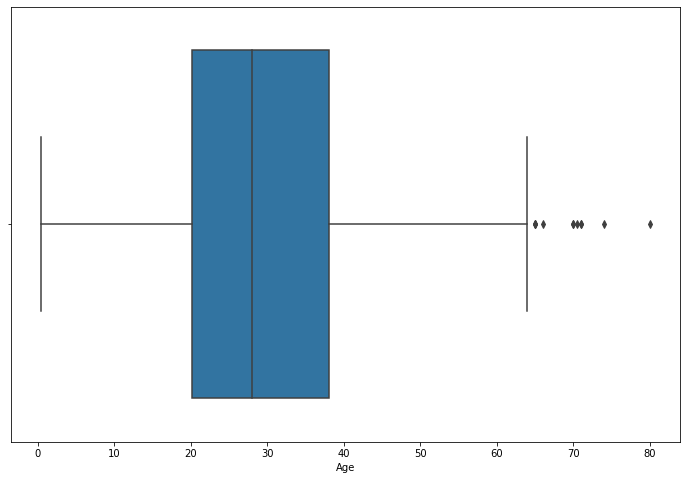

In [ ]:
# we can see that there are a few outliers for Age
# according to its distribution, these outliers will be masked when we replace NA by values at the far end 

plt.figure(figsize=(12,8))
sns.boxplot('Age', data=data5)

In [ ]:
def impute_na(df, variable, median, extreme):
    df[variable+'_far_end'] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)

In [ ]:
# let's replace the NA with the median value in the training and testing sets
impute_na(X_train, 'Age', X_train.Age.median(), X_train.Age.mean()+3*X_train.Age.std())
impute_na(X_test, 'Age', X_train.Age.median(), X_train.Age.mean()+3*X_train.Age.std())

In [ ]:
X_train['Age'].isnull().sum()

0

## **3.6 Missing Value Indicator** <a class="anchor" id="3.6"></a>



- A técnica do indicador ausente envolve a adição de uma variável binária para indicar se o valor está ausente para uma determinada observação. Esta variável assume o valor 1 se a observação estiver faltando, ou 0 caso contrário. Uma coisa a notar é que ainda precisamos substituir os valores ausentes na variável original, o que tendemos a fazer com imputação de média ou mediana. Ao usar essas 2 técnicas juntas, se o valor ausente tiver poder preditivo, ele será capturado pelo indicador ausente e, se não tiver, será mascarado pela imputação de média / mediana.

- Essas 2 técnicas combinadas tendem a funcionar bem com modelos lineares. No entanto, adicionar um indicador ausente expande o espaço de recursos e, como várias variáveis ​​tendem a ter valores ausentes para as mesmas observações, muitas dessas variáveis ​​binárias recém-criadas podem ser idênticas ou altamente correlacionadas.

## **Missing Value Indicator no dataset do Titanic**

In [ ]:
# make a copy of titanic dataset

data6 = titanic.copy()

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data6, data6.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [ ]:
# create variable indicating missingness

X_train['Age_NA'] = np.where(X_train['Age'].isnull(), 1, 0)
X_test['Age_NA'] = np.where(X_test['Age'].isnull(), 1, 0)

X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,1


In [ ]:
# we can see that mean and median are similar. So I will replace with the median

X_train.Age.mean(), X_train.Age.median()

(29.915338645418327, 29.0)

In [ ]:
# let's replace the NA with the median value in the training set
X_train['Age'].fillna(X_train.Age.median(), inplace=True)
X_test['Age'].fillna(X_train.Age.median(), inplace=True)

X_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,29.0,1,0,2689,14.4583,NaN,C,1
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,0
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S,0
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S,0


- We can see that another variable `Age_NA` is created to capture the missingness.

## **Conclusão - Quando usar cada método de imputação**


- Se os valores ausentes forem **inferiores a 5%** da variável, opte pela imputação de **média / mediana ou substituição aleatória da amostra**. Imputa pela categoria **mais frequente** se os valores ausentes forem **mais do que 5% da variável**. Efetue a **imputação de média / mediana + adição** de uma **variável binária** adicional para capturar a falta, adicione um rótulo 'ausente' nas variáveis ​​categóricas.

- Se o **número de NA** em uma variável for **pequeno**, é improvável que tenham um forte impacto na variável / alvo que você está tentando prever. Portanto, tratá-los de maneira especial certamente adicionará ruído às variáveis. Portanto, é mais útil substituir por média / amostra aleatória para preservar a distribuição das variáveis.

- Se a variável / alvo que você está tentando prever for altamente desequilibrada, então pode ser que este pequeno número de NA seja realmente informativo.

#### Exceções

- Se suspeitarmos que NAs não estão faltando aleatoriamente e não quisermos atribuir a ocorrência mais comum a NA, e se não quisermos aumentar o espaço de recursos adicionando uma variável adicional para indicar falta - nesses casos, substitua por um valor na extremidade da distribuição ou um valor arbitrário.

# **4. Codificação categórica - Categorical Encoding** <a class="anchor" id="4"> </a>



- Dados categóricos são dados que usam apenas um número limitado de valores.

- Por exemplo, se você respondeu a uma pesquisa sobre qual marca de carro eles possuem, o resultado seria categórico (porque as respostas seriam coisas como Honda, Toyota, Ford, Nenhum, etc.). As respostas se enquadram em um conjunto fixo de categorias.

- Você obterá um erro se tentar conectar essas variáveis ​​na maioria dos modelos de aprendizado de máquina em Python sem "codificá-los" primeiro. Aqui, mostraremos o método mais popular para codificar variáveis ​​categóricas.


- Codificação de variável categórica é um termo amplo para técnicas coletivas usadas para transformar strings ou rótulos de variáveis ​​categóricas em números. Existem várias técnicas sob este método:

  1. One-Hot encoding (OHE) - Codificação One-Hot (OHE)
  
  2. Ordinal encoding - Codificação ordinal

  3. Count and Frequency encoding - Codificação de contagem e frequência

  4. Target encoding / Mean encoding -  Codificação alvo / codificação média 

  5. Weight of Evidence - Peso da Prova

  6. Rare label encoding - Codificação de rótulo raro

## **4.1 One-Hot Encoding (OHE)** <a class="anchor" id="4.1"></a>

 
- OHE é a abordagem padrão para codificar dados categóricos.

- Uma codificação quente (OHE) cria uma variável binária para cada uma das diferentes categorias presentes em uma variável.

Essas variáveis ​​binárias recebem 1 se a observação mostrar uma determinada categoria ou 0 caso contrário. OHE é adequado para modelos lineares. Porém, o OHE expande o espaço de recursos de maneira bastante dramática se as variáveis ​​categóricas forem altamente cardinais ou se houver muitas variáveis ​​categóricas. Além disso, muitas das variáveis ​​dummy derivadas podem ser altamente correlacionadas.

- OHE, consiste em substituir a variável categórica por diferentes variáveis ​​booleanas, que assumem valor 0 ou 1, para indicar se uma determinada categoria / rótulo da variável estava presente para aquela observação. Cada uma das variáveis ​​booleanas também são conhecidas como variáveis ​​dummy ou variáveis ​​binárias.

- For example, from the categorical variable "Gender", with labels 'female' and 'male', we can generate the boolean variable "female", which takes 1 if the person is female or 0 otherwise. We can also generate the variable male, which takes 1 if the person is "male" and 0 otherwise.

In [ ]:
# make a copy of titanic dataset

data7 = titanic.copy()

In [ ]:
data7['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [ ]:
# one hot encoding

pd.get_dummies(data7['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
# for better visualisation
pd.concat([data7['Sex'], pd.get_dummies(data7['Sex'])], axis=1).head()

,Sex,female,male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1


- Podemos ver que precisamos apenas de 1 das 2 variáveis ​​dummy para representar a variável categórica original `Sexo`. Qualquer um dos 2 fará o trabalho, e não importa qual deles selecionarmos, pois eles são equivalentes. Portanto, para codificar uma variável categórica com 2 rótulos, precisamos apenas de 1 variável fictícia.

- Para estender este conceito, para codificar variáveis ​​categóricas com rótulos k, precisamos de k-1 variáveis ​​fictícias. Podemos realizar essa tarefa da seguinte maneira:

In [ ]:
# obtaining k-1 labels
pd.get_dummies(data7['Sex'], drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
# Let's now look at an example with more than 2 labels

data7['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [ ]:
# check the number of different labels
data7.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
# get whole set of dummy variables

pd.get_dummies(data7['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
# get k-1 dummy variables

pd.get_dummies(data7['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


- A API Scikt-Learn fornece uma classe para [codificação one-hot] (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

- Além disso, apresentarei a você uma ampla gama de opções de codificação do [pacote Category Encoders] (https://contrib.scikit-learn.org/categorical-encoding/) para uso com scikit-learn em Python.

- Ambas as opções acima também podem ser usadas para One-Hot Encoding.

## **Nota importante sobre OHE**

- Scikit-learn's [one hot encoder class] (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) aceita apenas valores numéricos categóricos. Portanto, qualquer valor de tipo de string deve ser codificado por rótulo primeiro, antes de um codificado a quente.

- No exemplo titânico, o gênero dos passageiros deve ser codificado por rótulo primeiro, antes de ser codificado um hot usando a classe de codificador one hot do Scikit-learn.

## **4.2 Ordinal encoding** <a class="anchor" id="4.2"></a>



- Variáveis ​​categóricas cujas categorias podem ser ordenadas de forma significativa são chamadas ordinais. Por exemplo:

  - Nota do aluno em um exame (A, B, C ou Reprovado).
  - Os dias da semana podem ser ordinais com segunda-feira = 1 e domingo = 7.
  - Nível educacional, com as categorias: Ensino fundamental, Ensino médio, Graduação universitária, Doutorado classificados de 1 a 4.
   
- Quando a variável categórica é ordinal, a abordagem mais direta é substituir os rótulos por algum número ordinal.

- Na codificação ordinal substituímos as categorias por dígitos, de forma arbitrária ou informada. Se codificarmos categorias arbitrariamente, atribuímos um inteiro por categoria de 1 a n, onde n é o número de categorias únicas. Se, em vez disso, atribuímos os inteiros de maneira informada, observamos a distribuição alvo: ordenamos as categorias de 1 a n, atribuindo 1 à categoria para a qual as observações mostram a maior média de valor alvo, en à categoria com o valor médio alvo mais baixo.

- Podemos usar [Category Encoders Package] (https://contrib.scikit-learn.org/categorical-encoding/) para realizar a codificação ordinal. Consulte a documentação para obter mais informações.


## **4.3 Count and Frequency Encoding** <a class="anchor" id="4.3"></a>

[Table of Contents](#0.1)


- In count encoding we replace the categories by the count of the observations that show that category in the dataset. Similarly, we can replace the category by the frequency -or percentage- of observations in the dataset. That is, if 10 of our 100 observations show the colour blue, we would replace blue by 10 if doing count encoding, or by 0.1 if replacing by the frequency. These techniques capture the representation of each label in a dataset, but the encoding may not necessarily be predictive of the outcome. 

- This approach is heavily used in Kaggle competitions, wherein we replace each label of the categorical variable by the count, this is the amount of times each label appears in the dataset. Or the frequency, this is the percentage of observations within that category. The two methods are equivalent.

In [ ]:
#import dataset
df_train = pd.read_csv('/content/Mercedes-Benz-train.csv')
                       

df_test = pd.read_csv('/content/Mercedes-Benz-test.csv') 
                      

In [ ]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [ ]:
# let's have a look at how many labels

for col in df_train.columns[3:9]:
    print(col, ': ', len(df_train[col].unique()), ' labels')

X1 :  27  labels
X2 :  44  labels
X3 :  7  labels
X4 :  4  labels
X5 :  29  labels
X6 :  12  labels


Ao fazer a transformação de contagem de variáveis ​​categóricas, é importante calcular a contagem (ou frequência = contagem / total de observações) no conjunto de treinamento e, em seguida, usar esses números para substituir os rótulos no conjunto de teste.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']], df_train.y,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((2946, 6), (1263, 6))

In [ ]:
# vamos obter as contagens para cada um dos rótulos na variável X2
# vamos capturar isso em um dicionário que podemos usar para mapear novamente os rótulos

X_train.X2.value_counts().to_dict()

{'a': 34,
 'aa': 1,
 'ac': 10,
 'ae': 342,
 'af': 1,
 'ag': 15,
 'ah': 3,
 'ai': 289,
 'ak': 188,
 'al': 3,
 'am': 1,
 'an': 3,
 'ao': 10,
 'ap': 5,
 'aq': 46,
 'as': 1155,
 'at': 5,
 'au': 3,
 'av': 2,
 'aw': 2,
 'ay': 40,
 'b': 12,
 'c': 1,
 'd': 12,
 'e': 61,
 'f': 59,
 'g': 10,
 'h': 4,
 'i': 15,
 'k': 16,
 'l': 1,
 'm': 284,
 'n': 97,
 'o': 1,
 'p': 1,
 'q': 3,
 'r': 101,
 's': 63,
 't': 17,
 'x': 8,
 'y': 8,
 'z': 14}

In [ ]:
# vamos olhar para o X_train para que possamos comparar a recodificação da variável

X_train.head()

,X1,X2,X3,X4,X5,X6
3059,aa,ai,c,d,q,g
3014,b,m,c,d,q,i
3368,o,f,f,d,s,l
2772,aa,as,d,d,p,j
3383,v,e,c,d,s,g


In [ ]:
# agora vamos substituir cada rótulo em X2 por sua contagem


# primeiro fazemos um dicionário que mapeia cada rótulo para as contagens
X_frequency_map = X_train.X2.value_counts().to_dict()

# e agora substituímos os rótulos X2 no trem e no conjunto de teste com o mesmo mapa
X_train.X2 = X_train.X2.map(X_frequency_map)
X_test.X2 = X_test.X2.map(X_frequency_map)

X_train.head()

,X1,X2,X3,X4,X5,X6
3059,aa,289,c,d,q,g
3014,b,284,c,d,q,i
3368,o,59,f,d,s,l
2772,aa,1155,d,d,p,j
3383,v,61,c,d,s,g


Onde no conjunto de dados original, para a observação 1 na variável 2 antes era 'ai', agora foi substituído pela contagem 289. E assim por diante para o resto das categorias.

## **4.4 Target / Mean Encoding** <a class="anchor" id="4.4"></a>

- Uma codificação de nível, também chamada de codificação de mídia, substitui cada categoria por uma variável, o valor médio do nível, por observações que representam uma determinada categoria. Por exemplo, temos uma categoria variável "cidade" e queremos que nosso cliente compre uma TV da qual enviamos um cartão. Se 30% das pessoas na cidade de "Londres" cobrirem a TV, substituiremos Londres por 0,3.


- Esta técnica tem 3 benefícios:

  1. não expande o espaço do recurso,

  2. captura algumas informações sobre o nível de codificação da categoria e

  3. cria uma relação monotônica entre variável e constante.
  

- As relações monotônicas entre a variável e o destino tendem a aumentar ou diminuir linearmente.
 

In [ ]:
# let's load again the titanic dataset

data = pd.read_csv('https://raw.githubusercontent.com/Rodrigo-Lopes-de-Andrade/Datasets/main/Feature_Engineering_Methods_train.csv', usecols=['Cabin', 'Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [ ]:
# let's fill NA values with an additional label

data.Cabin.fillna('Missing', inplace=True)
data.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [ ]:
# check number of different labels in Cabin

len(data.Cabin.unique())

148

In [ ]:
# Now we extract the first letter of the cabin

data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [ ]:
# check the labels
data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

### **Importante**

- O fator de risco deve ser calculado por rótulo considerando apenas o conjunto de treinamento e, em seguida, expandido para o conjunto de teste.

In [ ]:
# Let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[['Cabin', 'Survived']], data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 2), (268, 2))

In [ ]:
# let's calculate the target frequency for each label

X_train.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.428571
B    0.774194
C    0.571429
D    0.692308
E    0.740741
F    0.666667
G    0.500000
M    0.303609
T    0.000000
Name: Survived, dtype: float64

In [ ]:
# and now let's do the same but capturing the result in a dictionary

ordered_labels = X_train.groupby(['Cabin'])['Survived'].mean().to_dict()
ordered_labels

{'A': 0.42857142857142855,
 'B': 0.7741935483870968,
 'C': 0.5714285714285714,
 'D': 0.6923076923076923,
 'E': 0.7407407407407407,
 'F': 0.6666666666666666,
 'G': 0.5,
 'M': 0.3036093418259023,
 'T': 0.0}

In [ ]:
# replace the labels with the 'risk' (target frequency)
# note that we calculated the frequencies based on the training set only

X_train['Cabin_ordered'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordered_labels)

In [ ]:
# view results

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,0.740741
52,D,1,0.692308
386,M,0,0.303609
124,D,0,0.692308
578,M,0,0.303609


Text(0, 0.5, 'Survived')

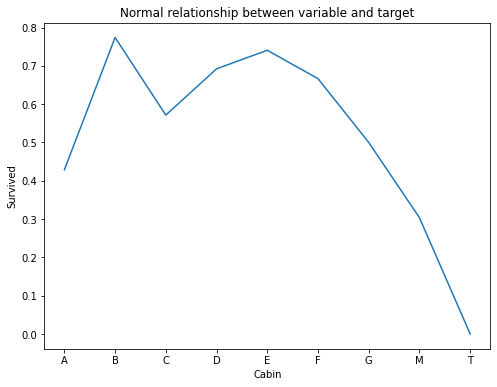

In [ ]:
# plot the original variable

fig = plt.figure(figsize=(8,6))
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0, 0.5, 'Survived')

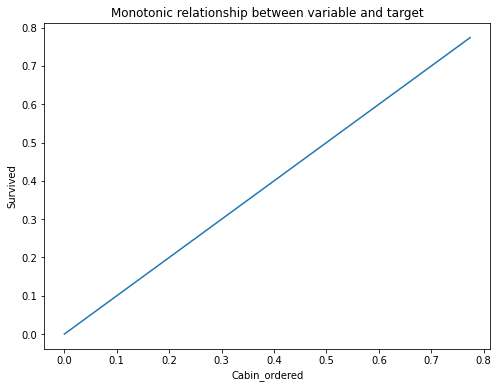

In [ ]:
# plot the transformed result: the monotonic variable

fig = plt.figure(figsize=(8,6))
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

## **4.5 Weight of evidence** <a class="anchor" id="4.5"></a>

[Table of Contents](#0.1)


- Weight of evidence (WOE) is a technique used to encode categorical variables for classification. WOE is the natural logarithm of the probability of the target being 1 divided the probability of the target being 0. WOE has the property that its value will be 0 if the phenomenon is random; it will be bigger than 0 if the probability of the target being 0 is bigger, and it will be smaller than 0 when the probability of the target being 1 is greater.

- WOE transformation creates a nice visual representation of the variable, because by looking at the WOE encoded variable, we can see, category by category, whether it favours the outcome of 0, or of 1. In addition, WOE creates a monotonic relationship between variable and target, and leaves all the variables within the same value range.

In [ ]:
# preview X_train

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,0.740741
52,D,1,0.692308
386,M,0,0.303609
124,D,0,0.692308
578,M,0,0.303609


In [ ]:
# now we calculate the probability of target=1 
X_train.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.428571
B    0.774194
C    0.571429
D    0.692308
E    0.740741
F    0.666667
G    0.500000
M    0.303609
T    0.000000
Name: Survived, dtype: float64

In [ ]:
# let's make a dataframe with the above calculation

prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.428571
B,0.774194
C,0.571429
D,0.692308
E,0.740741
F,0.666667
G,0.500000
M,0.303609
T,0.000000


In [ ]:
# and now the probability of target = 0 
# and we add it to the dataframe

prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df['Died'] = 1-prob_df.Survived
prob_df

,Survived,Died
Cabin,,
A,0.428571,0.571429
B,0.774194,0.225806
C,0.571429,0.428571
D,0.692308,0.307692
E,0.740741,0.259259
F,0.666667,0.333333
G,0.500000,0.500000
M,0.303609,0.696391
T,0.000000,1.000000


In [ ]:
# since the log of zero is not defined, let's set this number to something small and non-zero

prob_df.loc[prob_df.Survived == 0, 'Survived'] = 0.00001
prob_df

,Survived,Died
Cabin,,
A,0.428571,0.571429
B,0.774194,0.225806
C,0.571429,0.428571
D,0.692308,0.307692
E,0.740741,0.259259
F,0.666667,0.333333
G,0.500000,0.500000
M,0.303609,0.696391
T,0.000010,1.000000


In [ ]:
# now we calculate the WoE

prob_df['WoE'] = np.log(prob_df.Survived/prob_df.Died)
prob_df

,Survived,Died,WoE
Cabin,,,
A,0.428571,0.571429,-0.287682
B,0.774194,0.225806,1.232144
C,0.571429,0.428571,0.287682
D,0.692308,0.307692,0.810930
E,0.740741,0.259259,1.049822
F,0.666667,0.333333,0.693147
G,0.500000,0.500000,0.000000
M,0.303609,0.696391,-0.830169
T,0.000010,1.000000,-11.512925


In [ ]:
# and we create a dictionary to re-map the variable

prob_df['WoE'].to_dict()

{'A': -0.2876820724517809,
 'B': 1.232143681292632,
 'C': 0.28768207245178085,
 'D': 0.8109302162163288,
 'E': 1.0498221244986774,
 'F': 0.6931471805599452,
 'G': 0.0,
 'M': -0.8301689781242366,
 'T': -11.512925464970229}

In [ ]:
# and we make a dictionary to map the orignal variable to the WoE
# same as above but we capture the dictionary in a variable

ordered_labels = prob_df['WoE'].to_dict()

In [ ]:
# replace the labels with the WoE

X_train['Cabin_ordered'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordered_labels)

In [ ]:
# check the results

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,1.049822
52,D,1,0.810930
386,M,0,-0.830169
124,D,0,0.810930
578,M,0,-0.830169


Text(0, 0.5, 'Survived')

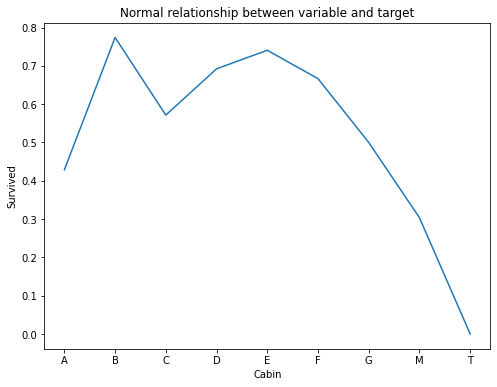

In [ ]:
# plot the original variable

fig = plt.figure(figsize=(8,6))
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0, 0.5, 'Survived')

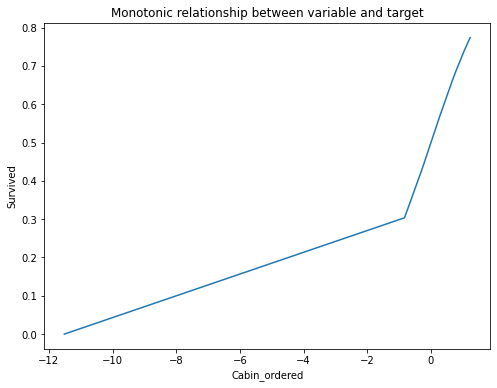

In [ ]:
# plot the transformed result: the monotonic variable

fig = plt.figure(figsize=(8,6))
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

We can see in the above plot, there is now a monotonic relationship between the variable Cabin and probability of survival. The higher the Cabin number, the more likely the person was to survive.

# **5. Variable Transformation** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)


- Some machine learning models like linear and logistic regression assume that the variables are normally distributed. Others benefit from **Gaussian-like** distributions, as in such distributions the observations of X available to predict Y vary across a greater range of values. Thus, Gaussian distributed variables may boost the machine learning algorithm performance.

- If a variable is not normally distributed, sometimes it is possible to find a mathematical transformation so that the transformed variable is Gaussian. Typically used mathematical transformations are:

 
  1. Logarithm transformation - log(x)

  2. Reciprocal transformation - 1 / x

  3. Square root transformation - sqrt(x)

  4. Exponential transformation - exp(x)

  5. Box-Cox transformation  
  
- Now, let's demonstrate the above transformations on the titanic dataset.

In [ ]:
# load the numerical variables of the Titanic Dataset

data = pd.read_csv('https://raw.githubusercontent.com/Rodrigo-Lopes-de-Andrade/Datasets/main/Feature_Engineering_Methods_train.csv', usecols = ['Age', 'Fare', 'Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


### **Fill missing data with random sample**

In [ ]:
# first I will fill the missing data of the variable age, with a random sample of the variable

def impute_na(data, variable):
    # function to fill na with a random sample
    df = data.copy()
    
    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [ ]:
# fill na
data['Age'] = impute_na(data, 'Age')

## **Age**


### **Original distribution**


- We can visualise the distribution of the `Age` variable, by plotting a histogram and the Q-Q plot.

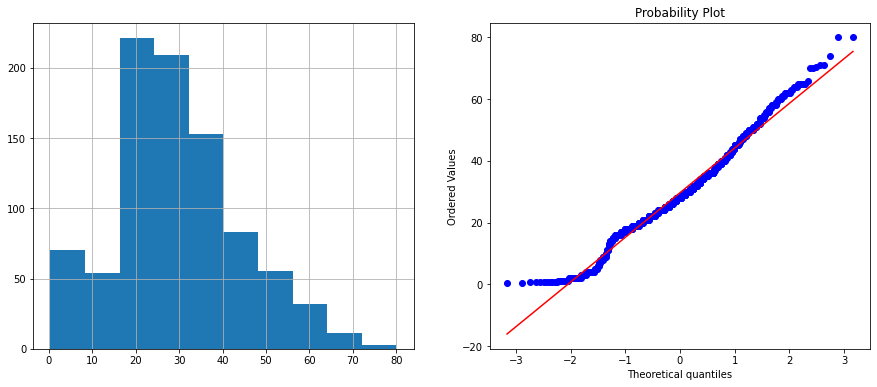

In [ ]:
# plot the histograms to have a quick look at the distributions
# we can plot Q-Q plots to visualise if the variable is normally distributed

def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()
    
diagnostic_plots(data, 'Age')

- The variable `Age` is almost normally distributed, except for some observations on the lower value tail of the distribution. Note the slight skew to the left in the histogram, and the deviation from the straight line towards the lower values in the Q-Q- plot. 

- In the following cells, I will apply the above mentioned transformations and compare the distributions of the transformed `Age` variable.

## **5.1 Logarithmic transformation** <a class="anchor" id="5.1"></a>

[Table of Contents](#0.1)

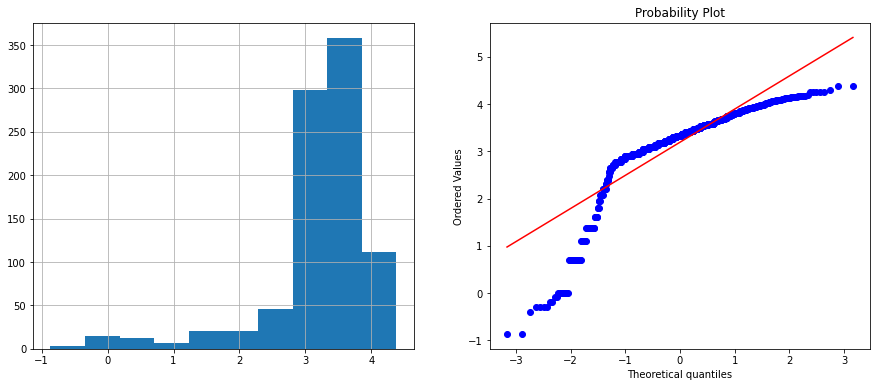

In [ ]:
### Logarithmic transformation
data['Age_log'] = np.log(data.Age)

diagnostic_plots(data, 'Age_log')

- The logarithmic transformation, did not produce a Gaussian like distribution for Age.

## **5.2 Reciprocal transformation** <a class="anchor" id="5.2"></a>

[Table of Contents](#0.1)

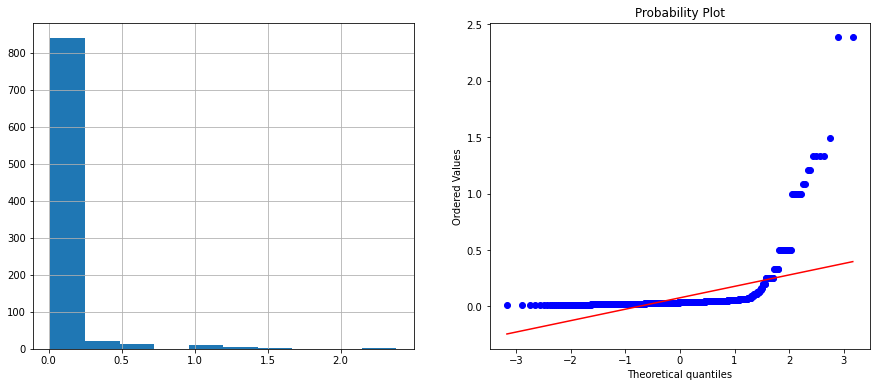

In [ ]:
### Reciprocal transformation
data['Age_reciprocal'] = 1 / data.Age

diagnostic_plots(data, 'Age_reciprocal')

The reciprocal transformation was also not useful to transform Age into a variable normally distributed.

## **5.3 Square root transformation** <a class="anchor" id="5.3"></a>

[Table of Contents](#0.1)

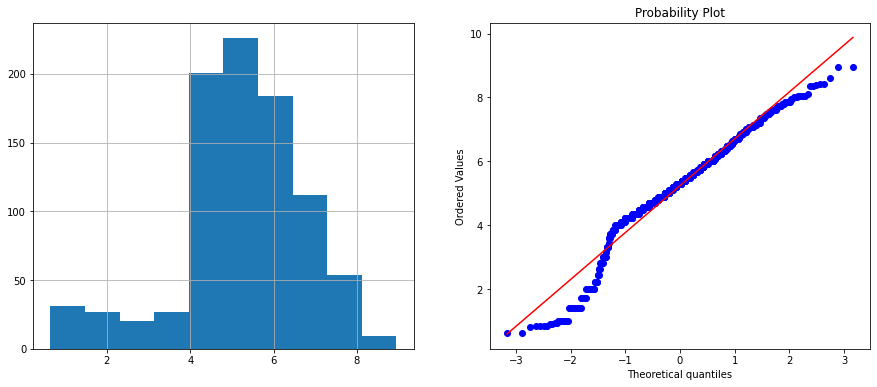

In [ ]:
data['Age_sqr'] =data.Age**(1/2)

diagnostic_plots(data, 'Age_sqr')

The square root transformation is a bit more succesful that the previous two transformations. However, the variable is still not Gaussian, and this does not represent an improvement towards normality respect the original distribution of Age.

## **5.4 Exponential Transformation** <a class="anchor" id="5.4"></a>

[Table of Contents](#0.1)

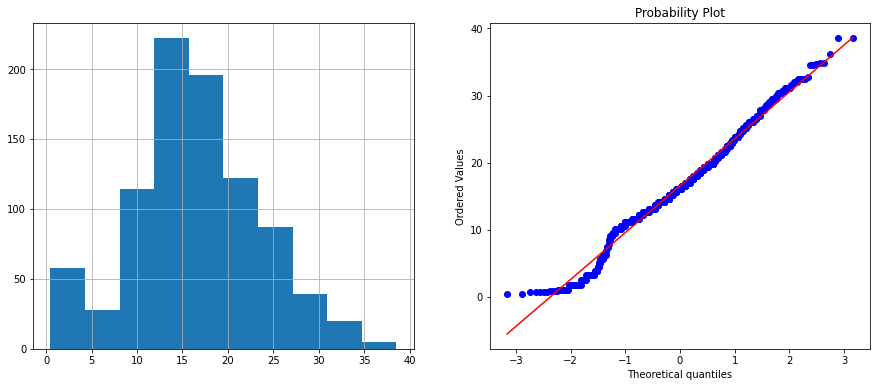

In [ ]:
data['Age_exp'] = data.Age**(1/1.2) 

diagnostic_plots(data, 'Age_exp')

The exponential transformation is the best of all the transformations above, at the time of generating a variable that is normally distributed. Comparing the histogram and Q-Q plot of the exponentially transformed Age with the original distribution, we can say that the transformed variable follows more closely a Gaussian distribution.

## **5.5 BoxCox transformation** <a class="anchor" id="5.5"></a>

[Table of Contents](#0.1)


- The Box-Cox transformation is defined as: 

     T(Y)=(Y exp(λ)−1)/λ

- where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

- Briefly, for each  λ (the transformation tests several λs), the correlation coefficient of the Probability Plot (Q-Q plot below, correlation between ordered values and theoretical quantiles) is calculated. 

- The value of λ corresponding to the maximum correlation on the plot is then the optimal choice for λ.

- In python, we can evaluate and obtain the best λ with the stats.boxcox function from the package scipy.

- We can proceed as follows -

Optimal λ:  0.7648522500282625


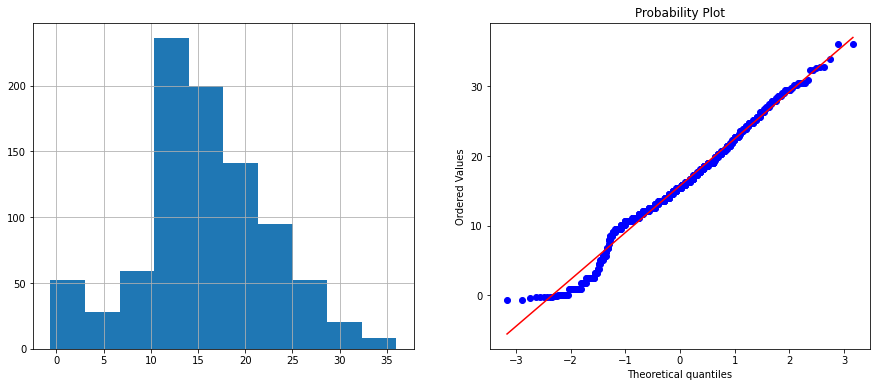

In [ ]:
data['Age_boxcox'], param = stats.boxcox(data.Age) 

print('Optimal λ: ', param)

diagnostic_plots(data, 'Age_boxcox')

The Box Cox transformation was as good as the exponential transformation we performed above to make Age look more Gaussian. Whether we decide to proceed with the original variable or the transformed variable, will depend of the purpose of the exercise.

# **6. Discretization** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)


- **Discretisation** is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that spans the range of the variable's values.

### Discretisation helps handle outliers and highly skewed variables

- **Discretisation** helps handle outliers by placing these values into the lower or higher intervals together with the remaining inlier values of the distribution. Thus, these outlier observations no longer differ from the rest of the values at the tails of the distribution, as they are now all together in the same interval / bucket. In addition, by creating appropriate bins or intervals, discretisation can help spread the values of a skewed variable across a set of bins with equal number of observations.

- There are several approaches to transform continuous variables into discrete ones. This process is also known as **binning**, with each bin being each  interval. 

- **Discretisation** refers to sorting the values of the variable into bins or intervals, also called buckets. There are multiple ways to discretise variables:
 

  1. Equal width discretisation

  2. Equal Frequency discretisation
  
  3. Domain knowledge discretisation

  4. Discretisation using decision trees

## **Discretising data with pandas cut and qcut functions**

- When dealing with continuous numeric data, it is often helpful to bin the data into multiple buckets for further analysis. Pandas supports these approaches using the **cut** and **qcut** functions.

- **cut** command creates equispaced bins but frequency of samples is unequal in each bin.

- **qcut** command creates unequal size bins but frequency of samples is equal in each bin.

- The following diagram illustrates the point :-

![Discretising data with pandas cut and qcut](https://i.stack.imgur.com/pObHa.png)

## **6.1 Equal width discretisation with pandas cut function** <a class="anchor" id="6.1"></a>

[Table of Contents](#0.1)


- Equal width binning divides the scope of possible values into N bins of the same width.The width is determined by the range of values in the variable and the number of bins we wish to use to divide the variable.

  width = (max value - min value) / N

- For example if the values of the variable vary between 0 and 100, we create 5 bins like this: width = (100-0) / 5 = 20. The bins thus are 0-20, 20-40, 40-60, 80-100. The first and final bins (0-20 and 80-100) can be expanded to accommodate outliers (that is, values under 0 or greater than 100 would be placed in those bins as well).

- There is no rule of thumb to define N. Typically, we would not want more than 10.

- Source : https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html


In [ ]:
# define x
x = np.array([24,  7,  2, 25, 22, 29])
x    

array([24,  7,  2, 25, 22, 29])

In [ ]:
# equal width discretisation with cut 
pd.cut(x, bins = 3, labels = ["bad", "medium", "good"]).value_counts() #Bins size has equal interval of 9   

bad       2
medium    0
good      4
dtype: int64

## **6.2 Equal frequency discretisation with pandas qcut function** <a class="anchor" id="6.2"></a>

[Table of Contents](#0.1)

- Equal frequency binning divides the scope of possible values of the variable into N bins, where each bin carries the same amount of observations. This is particularly useful for skewed variables as it spreads the observations over the different bins equally. Typically, we find the interval boundaries by determining the quantiles.

- Equal frequency discretisation using quantiles consists of dividing the continuous variable into N quantiles, N to be defined by the user. There is no rule of thumb to define N. However, if we think of the discrete variable as a categorical variable, where each bin is a category, we would like to keep N (the number of categories) low (typically no more than 10).

- Source : https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.qcut.html

In [ ]:
# define x
x = np.array([24,  7,  2, 25, 22, 29])
x    

array([24,  7,  2, 25, 22, 29])

In [ ]:
# equal frequency discretisation with qcut 
pd.qcut(x, q = 3, labels = ["bad", "medium", "good"]).value_counts() #Equal frequency of 2 in each bins

bad       2
medium    2
good      2
dtype: int64

## **6.3 Domain knowledge discretisation** <a class="anchor" id="6.3"></a>

[Table of Contents](#0.1)

- Frequently, when engineering variables in a business setting, the business experts determine the intervals in which they think the variable should be divided so that it makes sense for the business. These intervals may be defined both arbitrarily or following some criteria of use to the business. Typical examples are the discretisation of variables like Age and Income. 

- Income for example is usually capped at a certain maximum value, and all incomes above that value fall into the last bucket. As per Age, it is usually divided in certain groups according to the business need, for example division into  0-21 (for under-aged), 20-30 (for young adults), 30-40, 40-60, and > 60 (for retired or close to) are frequent.

In [ ]:
# load the numerical variables of the Titanic Dataset
data = pd.read_csv('https://raw.githubusercontent.com/Rodrigo-Lopes-de-Andrade/Datasets/main/Feature_Engineering_Methods_train.csv', usecols = ['Age', 'Survived'])
data.head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


The variable Age contains missing data, that I will fill by extracting a random sample of the variable.

In [ ]:
def impute_na(data, variable):
    df = data.copy()
    
    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = data[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [ ]:
# let's fill the missing data
data['Age'] = impute_na(data, 'Age')

In [ ]:
data['Age'].isnull().sum()

0

In [ ]:
# let's divide age into the buckets 

# bucket boundaries
buckets = [0,20,40,60,100]

# bucket labels
labels = ['0-20', '20-40', '40-60', '>60']

# discretisation
pd.cut(data.Age, bins = buckets, labels = labels, include_lowest=True).value_counts()

20-40    486
0-20     221
40-60    156
>60       28
Name: Age, dtype: int64

In [ ]:
# create two new columns after discretisation

data['Age_buckets_labels'] = pd.cut(data.Age, bins=buckets, labels = labels, include_lowest=True)
data['Age_buckets'] = pd.cut(data.Age, bins=buckets, include_lowest=True)

data.head()

,Survived,Age,Age_buckets_labels,Age_buckets
0,0,22.0,20-40,"(20.0, 40.0]"
1,1,38.0,20-40,"(20.0, 40.0]"
2,1,26.0,20-40,"(20.0, 40.0]"
3,1,35.0,20-40,"(20.0, 40.0]"
4,0,35.0,20-40,"(20.0, 40.0]"


In [ ]:
data.tail()

,Survived,Age,Age_buckets_labels,Age_buckets
886,0,27.0,20-40,"(20.0, 40.0]"
887,1,19.0,0-20,"(-0.001, 20.0]"
888,0,15.0,0-20,"(-0.001, 20.0]"
889,1,26.0,20-40,"(20.0, 40.0]"
890,0,32.0,20-40,"(20.0, 40.0]"


- We can observe the buckets into which each Age observation was placed. For example, age 27 was placed into the 20-40 bucket.

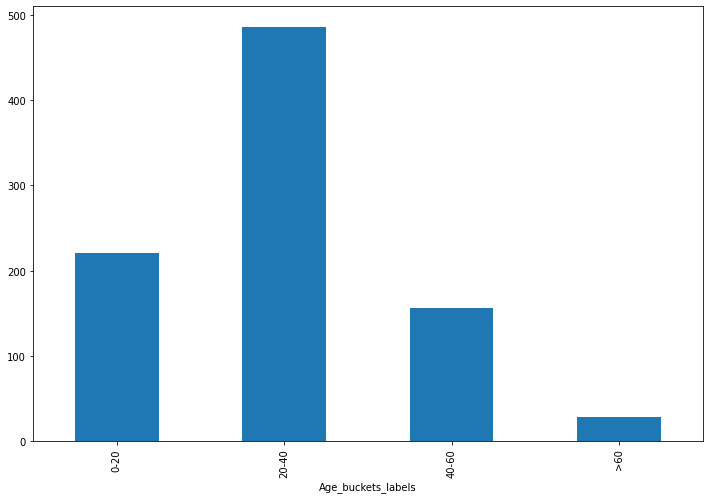

In [ ]:
# number of passengers per age bucket

plt.figure(figsize=(12,8))
data.groupby('Age_buckets_labels')['Age'].count().plot.bar()

- We can see that there are different passengers in each age bucket label.

# **7. Outlier Engineering** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)


- Outliers are values that are unusually high or unusually low respect to the rest of the observations of the variable. There are a few techniques for outlier handling:

  1. Outlier removal

  2. Treating outliers as missing values

  3. Discretisation

  4. Top / bottom / zero coding
 

### **Identifying outliers**

#### **Extreme Value Analysis**

- The most basic form of outlier detection is Extreme Value Analysis of 1-dimensional data. The key for this method is to determine the statistical tails of the underlying distribution of the variable, and then finding the values that sit at the very end of the tails.

- In the typical scenario, the distribution of the variable is Gaussian and thus outliers will lie outside the mean plus or minus 3 times the standard deviation of the variable.

- If the variable is not normally distributed, a general approach is to calculate the quantiles, and then the interquantile range (IQR), as follows:

- IQR = 75th quantile - 25th quantile

- An outlier will sit outside the following upper and lower boundaries:

- Upper boundary = 75th quantile + (IQR * 1.5)

- Lower boundary = 25th quantile - (IQR * 1.5)

or for extreme cases:

- Upper boundary = 75th quantile + (IQR * 3)

- Lower boundary = 25th quantile - (IQR * 3)

## **7.1 Outlier removal** <a class="anchor" id="7.1"></a>

[Table of Contents](#0.1)


- Outlier removal refers to removing outlier observations from the dataset. Outliers, by nature are not abundant, so this procedure should not distort the dataset dramatically. But if there are outliers across multiple variables, we may end up removing a big portion of the dataset.

## **7.2 Treating outliers as missing values** <a class="anchor" id="7.2"></a>

[Table of Contents](#0.1)

- We can treat outliers as missing information, and carry on any of the imputation methods described earlier in this kernel.

 

## **7.3 Discretisation** <a class="anchor" id="7.3"></a>

[Table of Contents](#0.1)

- Discretisation handles outliers automatically, as outliers are sorted into the terminal bins, together with the other higher or lower value observations. The best approaches are equal frequency and tree based discretisation.

## **7.4 Top /bottom / zero coding** <a class="anchor" id="7.4"></a>

[Table of Contents](#0.1)

- Top or bottom coding are also known as **Winsorisation** or **outlier capping**. The procedure involves capping the maximum and minimum values at a predefined value. This predefined value can be arbitrary, or it can be derived from the variable distribution.

- If the variable is normally distributed we can cap the maximum and minimum values at the mean plus or minus 3 times the standard deviation. If the variable is skewed, we can use the inter-quantile range proximity rule or cap at the top and bottom percentiles.

- This is demonstrated using the titanic dataset below:-

 



In [ ]:
# load the numerical variables of the Titanic Dataset
data = pd.read_csv('/kaggle/input/titanic/train.csv', usecols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived'])
data.head()

### **Top-coding important**

Top-coding and bottom-coding, as any other feature pre-processing step, should be determined over the training set, and then transferred onto the test set. This means that we should find the upper and lower bounds in the training set only, and use those bands to cap  the values in the test set.

In [ ]:
# divide dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

### **Outliers in continuous variables**

- We can see that `Age` and `Fare` are continuous variables. So, first I will cap the outliers in those variables.

In [ ]:
# let's make boxplots to visualise outliers in the continuous variables 
# Age and Fare

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(1, 2, 2)
fig = data.boxplot(column='Fare')
fig.set_title('')
fig.set_ylabel('Fare')

- Both Age and Fare contain outliers. Let's find which valuers are the outliers.

In [ ]:
# first we plot the distributions to find out if they are Gaussian or skewed.
# Depending on the distribution, we will use the normal assumption or the interquantile
# range to find outliers

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.Age.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

plt.subplot(1, 2, 2)
fig = data.Fare.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Fare')

Age is quite Gaussian and Fare is skewed, so I will use the Gaussian assumption for Age, and the interquantile range for Fare.

In [ ]:
# find outliers

# Age
Upper_boundary = data.Age.mean() + 3* data.Age.std()
Lower_boundary = data.Age.mean() - 3* data.Age.std()
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

# Fare
IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)
Lower_fence = data.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = data.Fare.quantile(0.75) + (IQR * 3)
print('Fare outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

### **Age**

- For Age variable the outliers lie only on the right of the distribution. Therefore we only need to introduce top-coding.

In [ ]:
# view the statistical summary of Age
data.Age.describe()

In [ ]:
# Assuming normality

Upper_boundary = X_train.Age.mean() + 3* X_train.Age.std()
Upper_boundary

In [ ]:
# top-coding the Age variable

X_train.loc[X_train.Age>73, 'Age'] = 73
X_test.loc[X_test.Age>73, 'Age'] = 73

X_train.Age.max(), X_test.Age.max()

### **Fare**

- The outliers, according to the above plot, lie all at the right side of the distribution. This is, some people paid extremely high prices for their tickets. Therefore, in this variable, only extremely high values will affect the performance of our machine learning models, and we need to do therefore top-coding. 

In [ ]:
# view statistical properties of Fare

X_train.Fare.describe()

In [ ]:
# top coding: upper boundary for outliers according to interquantile proximity rule

IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)

Upper_fence = X_train.Fare.quantile(0.75) + (IQR * 3)

Upper_fence

The upper boundary, above which every value is considered an outlier is a cost of 100 dollars for the Fare.

In [ ]:
# top-coding: capping the variable Fare at 100
X_train.loc[X_train.Fare>100, 'Fare'] = 100
X_test.loc[X_test.Fare>100, 'Fare'] = 100
X_train.Fare.max(), X_test.Fare.max()

Thus we deal with outliers from a machine learning perspective.

# **8. Date and Time Engineering** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)


Date variables are special type of categorical variable. By their own nature, date variables will contain a multitude of different labels, each one corresponding to a specific date and sometimes time. Date variables, when preprocessed properly can highly enrich a dataset. For example, from a date variable we can extract:

- Month
- Quarter
- Semester
- Day (number)
- Day of the week
- Is Weekend?
- Hr
- Time differences in years, months, days, hrs, etc.


It is important to understand that date variables should not be used as the categorical variables we have been working so far when building a machine learning model. Not only because they have a multitude of categories, but also because when we actually use the model to score a new observation, this observation will most likely be in the future, an therefore its date label, will be different than the ones contained in the training set and therefore the ones used to train the machine learning algorithm.


- I will use the lending club dataset for demonstration -

In [ ]:
# let's load the Lending Club dataset with selected columns and rows

use_cols = ['issue_d', 'last_pymnt_d']
data = pd.read_csv('/content/loan.csv', usecols=use_cols, nrows=10000)
data.head()

,issue_d,last_pymnt_d
0,Dec-11,Jan-15
1,Dec-11,Apr-13
2,Dec-11,Jun-14
3,Dec-11,Jan-15
4,Dec-11,May-16


In [ ]:
# now let's parse the dates, currently coded as strings, into datetime format

data['issue_dt'] = pd.to_datetime(data.issue_d)
data['last_pymnt_dt'] = pd.to_datetime(data.last_pymnt_d)

data[['issue_d','issue_dt','last_pymnt_d', 'last_pymnt_dt']].head()

OutOfBoundsDatetime: ignored

In [ ]:
# Extracting Month from date

data['issue_dt_month'] = data['issue_dt'].dt.month

data[['issue_dt', 'issue_dt_month']].head()

KeyError: ignored

In [ ]:
data[['issue_dt', 'issue_dt_month']].tail()

KeyError: ignored

In [ ]:
# Extract quarter from date variable

data['issue_dt_quarter'] = data['issue_dt'].dt.quarter

data[['issue_dt', 'issue_dt_quarter']].head()

KeyError: ignored

In [ ]:
data[['issue_dt', 'issue_dt_quarter']].tail()

In [ ]:
# We could also extract semester

data['issue_dt_semester'] = np.where(data.issue_dt_quarter.isin([1,2]),1,2)
data.head()

In [ ]:
# day - numeric from 1-31

data['issue_dt_day'] = data['issue_dt'].dt.day

data[['issue_dt', 'issue_dt_day']].head()

In [ ]:
# day of the week - from 0 to 6

data['issue_dt_dayofweek'] = data['issue_dt'].dt.dayofweek

data[['issue_dt', 'issue_dt_dayofweek']].head()

In [ ]:
data[['issue_dt', 'issue_dt_dayofweek']].tail()

In [ ]:
# day of the week - name

data['issue_dt_dayofweek'] = data['issue_dt'].dt.weekday_name

data[['issue_dt', 'issue_dt_dayofweek']].head()

In [ ]:
data[['issue_dt', 'issue_dt_dayofweek']].tail()

In [ ]:
# was the application done on the weekend?

data['issue_dt_is_weekend'] = np.where(data['issue_dt_dayofweek'].isin(['Sunday', 'Saturday']), 1,0)
data[['issue_dt', 'issue_dt_dayofweek','issue_dt_is_weekend']].head()

In [ ]:
data[data.issue_dt_is_weekend==1][['issue_dt', 'issue_dt_dayofweek','issue_dt_is_weekend']].head()

In [ ]:
# extract year 

data['issue_dt_year'] = data['issue_dt'].dt.year

data[['issue_dt', 'issue_dt_year']].head()

In [ ]:
# extract the date difference between 2 dates

data['issue_dt'] - data['last_pymnt_dt']

# **9. References** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)


This kernel is based on -

1. Soledad Galli's course - [Feature Engineering for Machine Learning](https://www.udemy.com/course/feature-engineering-for-machine-learning/) , and 

2. Her article - [Feature Engineering for Machine Learning ; A Comprehensive Overview](https://www.trainindata.com/post/feature-engineering-comprehensive-overview).



[Go to Top](#0)